In [2]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.2/948.2 kB 16.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for peewee: filename=peewee-3.17.8-py3-none-any.whl size=139017 sha256=435a4e423d75ebeef9a27496367678210fbba043ee9539a127fbde8d125921dc
  Stored in directory: /home/ouedraogo/snap/jupyterlab-desktop/common/.cache/pip/wheels/8f/65/34/456800445efeafb05164fe95285c70e81ba1d96bae30f43917
Successfully built peewee


## Question 1: Use yfinance to Extract Stock Data

In [7]:
import yfinance as yf
tesla_data = yf.download("TSLA", start="2024-01-01", end="2024-08-01")
tesla_data.reset_index(inplace=True)
tesla_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,TSLA,TSLA,TSLA,TSLA,TSLA
0,2024-01-02,248.419998,251.250000,244.410004,250.080002,104654200
1,2024-01-03,238.449997,245.679993,236.320007,244.979996,121082600
2,2024-01-04,237.929993,242.699997,237.729996,239.250000,102629300
3,2024-01-05,237.490005,240.119995,234.899994,236.860001,92379400
4,2024-01-08,240.449997,241.250000,235.300003,236.139999,85166600


# Question 2: Use Webscraping to Extract Tesla Revenue Data

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# URL for Tesla revenue data
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables on the page and identify the correct one
tables = soup.find_all("table")
revenue_table = None
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:  # Look for the table by text content
        revenue_table = table
        break
# Check if the table was found
if revenue_table is None:
    raise ValueError("The table 'Tesla Quarterly Revenue' was not found on the page.")
# Extract rows from the table
rows = revenue_table.find_all("tr")
data = []
# Process rows and extract Date and Revenue columns
for row in rows[1:]:  # Skip header row
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure valid data rows
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Create a DataFrame
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")  # Convert to numeric
tesla_revenue.dropna(inplace=True)  # Drop rows with missing values
# Display the last five rows
print(tesla_revenue.tail())

          Date  Revenue
48  2010-09-30     31.0
49  2010-06-30     28.0
50  2010-03-31     21.0
52  2009-09-30     46.0
53  2009-06-30     27.0


# Question 3: Use yfinance to Extract Stock Data

In [37]:
import pandas as pd
import yfinance as yf
gme_data = yf.download("GME", start="2020-01-01", end="2025-01-01")
# Reset the index
gme_data.reset_index(inplace=True)
# Save the DataFrame to a CSV file
gme_data.to_csv("gme_data.csv", index=False)
print(gme_data.head())



[*********************100%***********************]  1 of 1 completed

Price        Date   Close    High     Low    Open    Volume
Ticker                GME     GME     GME     GME       GME
0      2020-01-02  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08  1.4300  1.4625  1.3525  1.3725  22517600


# Question 4: Use Webscraping to Extract GME Revenue Data

In [41]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
# URL for Tesla revenue data
url = " https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

# Find all tables on the page and identify the correct one
tables = soup.find_all("table")
#print(tables)
revenue_table = None
for table in tables:
    if "GameStop Quarterly Revenue" in table.text:  # Look for the table by text content
        revenue_table = table
        break
# Check if the table was found
if revenue_table is None:
    raise ValueError("The table GameStop Quarterly Revenue was not found on the page.")
# Extract rows from the table
rows = revenue_table.find_all("tr")
data = []
# Process rows and extract Date and Revenue columns
for row in rows[1:]:  # Skip header row
    cols = row.find_all("td")
    if len(cols) == 2:  # Ensure valid data rows
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        data.append([date, revenue])

# Create a DataFrame
tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(",", "").str.replace("$", "")
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")  # Convert to numeric
tesla_revenue.dropna(inplace=True)  # Drop rows with missing values
# Display the last five rows
print(tesla_revenue.tail())

          Date  Revenue
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709


# Question 5: Plot Tesla Stock Graph

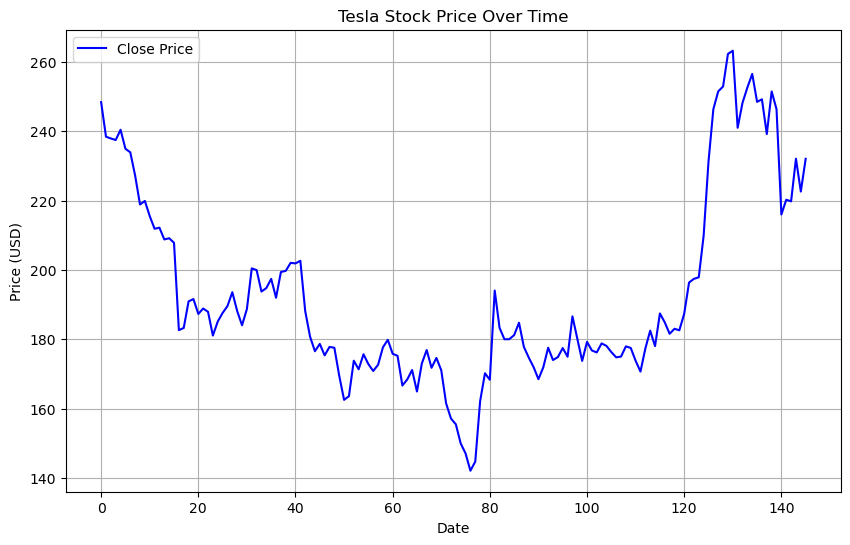

In [43]:
import matplotlib.pyplot as plt
# Define the function to plot the graph
def make_graph(data, title="Tesla Stock Price"):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='b')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the make_graph function
make_graph(tesla_data, title="Tesla Stock Price Over Time")


# Question 6: Plot GameStop Stock Graph

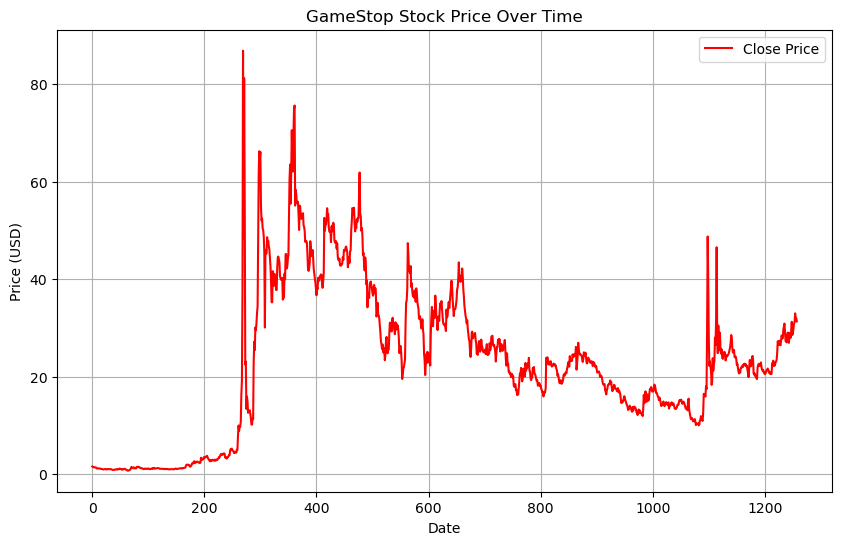

In [44]:
import matplotlib.pyplot as plt
def make_graph(data, title="GameStop Stock Price"):
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data['Close'], label='Close Price', color='r')
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the make_graph function
make_graph(gme_data, title="GameStop Stock Price Over Time")
